# Nike - [Dream Crazy](https://www.youtube.com/watch?v=E48hHS-5HyM&t=17s) 
## Sentiment Analysis

In September 2018, Nike announced its partnership with Colin Kaepernick and released a commercial shortly after titled, Dream Crazy. The ad reached millions. This collection of [tweets](https://www.kaggle.com/eliasdabbas/5000-justdoit-tweets-dataset) was collected on September 7, 2018, days after the ad's release. 

My goal is to learn about how the partnership and ad campaign affected consumer sentiment while also developing my analysis skills. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
from bs4 import BeautifulSoup
from textblob import TextBlob
import random
from wordcloud import WordCloud, STOPWORDS

In [2]:
dataset = pd.read_csv('campaign_tweets.csv')

print("There are {} observations and {} features in this dataset. \n".format(dataset.shape[0],dataset.shape[1]))

There are 5089 observations and 72 features in this dataset. 



In [3]:
dataset.head()

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,...,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47...","{'media': [{'id': 1038100853872197632, 'id_str...",0,False,Done is better than perfect. — Sheryl Sandberg...,NaN,...,333333,True,False,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False
1,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90,...",NaN,0,False,Shout out to the Great Fire Department and the...,NaN,...,333333,True,False,yungcutup,618822.0,NaN,none,http://t.co/lVm8vfDbfO,NaN,False
2,NaN,NaN,Fri Sep 07 16:24:50 +0000 2018,"[0, 176]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038100773396041728, 'id_str...",0,False,There are some AMAZINGLY hilarious Nike Ad mem...,NaN,...,050505,True,False,rachelbogle,48075.0,NaN,none,https://t.co/g9exqgZp9x,NaN,True
3,NaN,"{'type': 'Point', 'coordinates': [-86.45594032...",Fri Sep 07 16:24:44 +0000 2018,"[0, 88]","{'hashtags': [{'text': 'kapernickeffect', 'ind...",NaN,0,False,#kapernickeffect #swoosh #justdoit @ Lucas Bis...,"{'type': 'Point', 'coordinates': [35.85402047,...",...,333333,True,False,ErvGotti609,1983.0,NaN,none,NaN,NaN,False
4,NaN,NaN,Fri Sep 07 16:24:39 +0000 2018,"[0, 132]","{'hashtags': [{'text': 'shaquem', 'indices': [...","{'media': [{'id': 1038100736595255296, 'id_str...",0,False,"One Hand, One Dream: The Shaquem Griffin Story...",NaN,...,1A1E1A,True,False,NoLuckNeeded,24989.0,NaN,none,http://t.co/MMGF9RfLz0,NaN,False


In [4]:
## This dataset only contains tweets written in english.
dataset['tweet_lang'].value_counts()

en    5089
Name: tweet_lang, dtype: int64

In [5]:
## 65 users have the speical blue checkmark.
print(dataset['user_verified'].value_counts())

False    5023
True       65
Name: user_verified, dtype: int64


## Text Cleaning

In [8]:
## Tweets contain punctuation, emojis, and links.
test_tweet = dataset['tweet_full_text'][63]
test_tweet

'It saved me it can save you too #JUSTDOIT 🌚🐾‼️ https://t.co/NYIuOqktj3'

In [9]:
def clean_tweet(text):
    text = "".join([char for char in text if char not in string.punctuation]) ## remove punctuation
    text = re.sub('https\S+', '', text) ## remove the link in each tweet.
    text = text.encode('ascii', 'ignore').decode('ascii')
    text = BeautifulSoup(text) ## remove emojis and similar characters
    text = "".join([char for char in text if char not in string.punctuation]) ## final punctuation removal
    return text
clean_tweet(test_tweet)
## We can handle a case with emojis, punctuation, and links. 

'It saved me it can save you too JUSTDOIT  '

In [10]:
## Let's clean all the tweets. 
list_of_tweets = []

for i in range(0, len(dataset)):
    text = dataset['tweet_full_text'][i]
    clean_text = str(clean_tweet(text))
    list_of_tweets.append(clean_text)
    
dataset['tweet_text_clean'] = list_of_tweets

In [11]:
dataset.head()

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,...,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified,tweet_text_clean
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47...","{'media': [{'id': 1038100853872197632, 'id_str...",0,False,Done is better than perfect. — Sheryl Sandberg...,NaN,...,True,False,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False,Done is better than perfect Sheryl Sandberg q...
1,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90,...",NaN,0,False,Shout out to the Great Fire Department and the...,NaN,...,True,False,yungcutup,618822.0,NaN,none,http://t.co/lVm8vfDbfO,NaN,False,Shout out to the Great Fire Department and the...
2,NaN,NaN,Fri Sep 07 16:24:50 +0000 2018,"[0, 176]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038100773396041728, 'id_str...",0,False,There are some AMAZINGLY hilarious Nike Ad mem...,NaN,...,True,False,rachelbogle,48075.0,NaN,none,https://t.co/g9exqgZp9x,NaN,True,There are some AMAZINGLY hilarious Nike Ad mem...
3,NaN,"{'type': 'Point', 'coordinates': [-86.45594032...",Fri Sep 07 16:24:44 +0000 2018,"[0, 88]","{'hashtags': [{'text': 'kapernickeffect', 'ind...",NaN,0,False,#kapernickeffect #swoosh #justdoit @ Lucas Bis...,"{'type': 'Point', 'coordinates': [35.85402047,...",...,True,False,ErvGotti609,1983.0,NaN,none,NaN,NaN,False,kapernickeffect swoosh justdoit Lucas Bishops...
4,NaN,NaN,Fri Sep 07 16:24:39 +0000 2018,"[0, 132]","{'hashtags': [{'text': 'shaquem', 'indices': [...","{'media': [{'id': 1038100736595255296, 'id_str...",0,False,"One Hand, One Dream: The Shaquem Griffin Story...",NaN,...,True,False,NoLuckNeeded,24989.0,NaN,none,http://t.co/MMGF9RfLz0,NaN,False,One Hand One Dream The Shaquem Griffin Story ...


In [13]:
list_of_sentiments = []  
list_of_sentiment_scores = []
for i in range(0, len(dataset)):
        blob = TextBlob(dataset['tweet_text_clean'][i]) 
        if blob.sentiment[0] > 0:
            sentiment = 'positive'
        elif blob.sentiment[0] < 0:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'    
        list_of_sentiments.append(sentiment) 
        
        list_of_sentiment_scores.append(blob.sentiment[0])
        
dataset['tweet_sentiment_score'] = list_of_sentiment_scores
dataset['tweet_sentiment'] = list_of_sentiments       

## An example of a tweet, its sentiment score, and its sentiment label
print(dataset['tweet_text_clean'][0])
print(dataset['tweet_sentiment_score'][0])
print(dataset['tweet_sentiment'][0])

Done is better than perfect  Sheryl Sandberg quote motivation justdoit 
0.75
positive


In [14]:
dataset.head()

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,...,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified,tweet_text_clean,tweet_sentiment_score,tweet_sentiment
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47...","{'media': [{'id': 1038100853872197632, 'id_str...",0,False,Done is better than perfect. — Sheryl Sandberg...,NaN,...,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False,Done is better than perfect Sheryl Sandberg q...,0.750000,positive
1,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90,...",NaN,0,False,Shout out to the Great Fire Department and the...,NaN,...,yungcutup,618822.0,NaN,none,http://t.co/lVm8vfDbfO,NaN,False,Shout out to the Great Fire Department and the...,0.650000,positive
2,NaN,NaN,Fri Sep 07 16:24:50 +0000 2018,"[0, 176]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038100773396041728, 'id_str...",0,False,There are some AMAZINGLY hilarious Nike Ad mem...,NaN,...,rachelbogle,48075.0,NaN,none,https://t.co/g9exqgZp9x,NaN,True,There are some AMAZINGLY hilarious Nike Ad mem...,0.270833,positive
3,NaN,"{'type': 'Point', 'coordinates': [-86.45594032...",Fri Sep 07 16:24:44 +0000 2018,"[0, 88]","{'hashtags': [{'text': 'kapernickeffect', 'ind...",NaN,0,False,#kapernickeffect #swoosh #justdoit @ Lucas Bis...,"{'type': 'Point', 'coordinates': [35.85402047,...",...,ErvGotti609,1983.0,NaN,none,NaN,NaN,False,kapernickeffect swoosh justdoit Lucas Bishops...,0.000000,neutral
4,NaN,NaN,Fri Sep 07 16:24:39 +0000 2018,"[0, 132]","{'hashtags': [{'text': 'shaquem', 'indices': [...","{'media': [{'id': 1038100736595255296, 'id_str...",0,False,"One Hand, One Dream: The Shaquem Griffin Story...",NaN,...,NoLuckNeeded,24989.0,NaN,none,http://t.co/MMGF9RfLz0,NaN,False,One Hand One Dream The Shaquem Griffin Story ...,0.000000,neutral


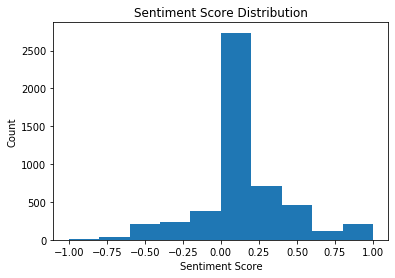

In [15]:
## Plotting the distribution of sentiment scores
plt.hist(list_of_sentiment_scores)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.show()

In [16]:
sentiment_counts = dataset['tweet_sentiment'].value_counts()
print("Percentage of positive tweets: {:.2f}%".format((sentiment_counts[0]/len(dataset)*100)))
print("Percentage of neutral tweets: {:.2f}%".format((sentiment_counts[1]/len(dataset)*100)))
print("Percentage of negative tweets: {:.2f}%".format((sentiment_counts[2]/len(dataset)*100)))

Percentage of positive tweets: 43.39%
Percentage of neutral tweets: 39.69%
Percentage of negative tweets: 16.92%


In [17]:
pos_tweets = dataset[dataset['tweet_sentiment'] == 'positive'].reset_index()
neut_tweets = dataset[dataset['tweet_sentiment'] == 'neutral'].reset_index()
neg_tweets = dataset[dataset['tweet_sentiment'] == 'negative'].reset_index()


## A function that generates 10 positive, neutral, or negative tweets at random. 

def see_tweets():
    user_input = input("What kinds of tweets would you like to see? ") 
    if user_input == 'positive':
        tweet_selection = random.choices(pos_tweets['tweet_text_clean'], k=10)
    elif user_input == 'negative':
        tweet_selection = random.choices(neg_tweets['tweet_text_clean'], k=10)
    elif user_input == 'neutral':
        tweet_selection = random.choices(neut_tweets['tweet_text_clean'], k=10)
    else:
        tweet_selection = "Error: incorrect format."        
    return tweet_selection

see_tweets()

What kinds of tweets would you like to see?  positive


['justdoit More like justpooit ',
 'hed look really good moving into the white house\n\nJustDoIt ',
 'Best one yet  Nike justdoit doit believeinsomethingevenifitmeanssacrificingeverything ',
 'Just saw the Nike TV ad with Kaepernick7 Daaaammmnn A commercial got me choked up Beautiful justdoit Nike Yes this commercial alone will make me buy Nike RespectNike',
 'Lets go team Love continues to win  Kaepernick7 JustDoIt   ',
 'FriYAY feels from the hilarious freddiemade \nnike justdoit  Sydney Opera House ',
 'SO to everyone for taking advantage of Big Baller Brand 30 OFF BacktoSchool special in honor of Colin Kaepernick geturmerch  justdoit ',
 'Nike you should make something similar amp put your logo on it and while you are at it do a special line of shoes to match JustDoIt ',
 'Should be a great US Open Final JustDoIt',
 'That Nike JustDoIt campaign is deep\n\nJust saying it to myself gives some kind of satisfaction on some past decisions that up until recent times I often blame myself 

## Issues

TextBlob's sentiment method is having a tough time distinguishing between negative and positive tweets. One reason is because the language used in the commercial itself is considered 'negative'. A word like crazy has a large negative impact on the sentiment score of the tweet. For example, consider this tweet: 

"Nike done crazy Epic for their 30th anniversary seeking to tap into the next big market base amp making a political statement same timeBelieve in something even if it means sacrificing everything Dont ask if your dreams r crazy ask if they r crazy enoughJustDoIt"   

This tweet is classified as 'negative' because the word crazy appears thrice. One instance of crazy has a sentiment score of -0.6.

** Sentiment scores for each tweet are calculated by summing the polarity values for each keyword in a sentence and dividing by number of keywords. What is a keyword? A word that has non-zero sentiment (polarity and subjectivity) values. 

In [19]:
## Sentiment score of the word 'crazy' is -0.6. 
TextBlob("crazy").sentiment

Sentiment(polarity=-0.6, subjectivity=0.9)

## Solution

In [31]:
# Let's try using tweets that contain Nike, nike, Kaepernick, and other important words. 
keyword_list = []

for i in range(0, len(dataset)):
    keywords = ("Nike" in dataset['tweet_text_clean'][i]) | ("nike" in dataset['tweet_text_clean'][i]) | ("Kaepernick" in dataset['tweet_text_clean'][i]) | ("kaepernick" in dataset['tweet_text_clean'][i]) | ("Colin" in dataset['tweet_text_clean'][i]) | ("colin" in dataset['tweet_text_clean'][i]) | ("kneel" in dataset['tweet_text_clean'][i]) | ("colinkaepernick" in dataset['tweet_text_clean'][i])            
    keyword_list.append(keywords)
    
new_dataset = dataset[keyword_list]
print(new_dataset.shape, "\n")
print(new_dataset['tweet_text_clean'][0:5])

(2728, 75) 

1    Shout out to the Great Fire Department and the...
2    There are some AMAZINGLY hilarious Nike Ad mem...
4    One Hand One Dream The Shaquem Griffin Story  ...
5    realDonaldTrump Its time for me to stock up on...
7    Nike good job on shaking the whole world i see...
Name: tweet_text_clean, dtype: object


In [32]:
## Let's look at the breakdown of positive, negative, and neutral tweets now. 
sentiment_counts_2 = new_dataset['tweet_sentiment'].value_counts()
print("Percentage of positive tweets: {:.2f}%".format((sentiment_counts_2[0]/len(new_dataset)*100)))
print("Percentage of neutral tweets: {:.2f}%".format((sentiment_counts_2[1]/len(new_dataset)*100)))
print("Percentage of negative tweets: {:.2f}%".format((sentiment_counts_2[2]/len(new_dataset)*100)))

Percentage of positive tweets: 46.96%
Percentage of neutral tweets: 36.77%
Percentage of negative tweets: 16.28%


The sentiment proportions show little change even after selecting tweets with 'important' words.

In [34]:
pos_tweets_sub = new_dataset[new_dataset['tweet_sentiment'] == 'positive'].reset_index()
neut_tweets_sub = new_dataset[new_dataset['tweet_sentiment'] == 'neutral'].reset_index()
neg_tweets_sub = new_dataset[new_dataset['tweet_sentiment'] == 'negative'].reset_index()

## A function that generates 10 positive, neutral, or negative tweets at random. Now, with the focused dataset.

def see_tweets_sub():
    user_input = input("What kinds of tweets would you like to see? ") 
    if user_input == 'positive':
        tweet_selection = random.choices(pos_tweets_sub['tweet_text_clean'], k=10)
    elif user_input == 'negative':
        tweet_selection = random.choices(neg_tweets_sub['tweet_text_clean'], k=10)
    elif user_input == 'neutral':
        tweet_selection = random.choices(neut_tweets_sub['tweet_text_clean'], k=10)
    else:
        tweet_selection = "Error: incorrect format."
        
    return tweet_selection
see_tweets_sub()

What kinds of tweets would you like to see?  positive


['I am in Lagos Nigeria writing about a Nike ad shot in the US \nIts titled Brands and social causes Colin Kaepernick kaepernick7 and nike Nikes Just do it campaign Link in bio \nJustdoit Nike ColinKaepernick ',
 'I just did it Did what I just brought my old Nike shoes to the shoemaker to be repaired JustDoIt NikeBoycott ',
 'Im just saying Nike Air Monarchs may not be stylish but theyre definitely great for running if youre big Too bad I cant look at those shoes the same way cause of a few racists  JustDoIt',
 'Such an amazing day at work today Nike and seeing colinkaepernick walk across the stage  kaepernick7 nike justdoit teamnike teamkap  Nike World Headquarters ',
 'Nike if you were running for President you would have my vote  NikeCommercial nike justdoit glad you were crazy enough to just go for it with this campaign  Its time to sell more than shoes its time to take a stand  Our Freedoms are everything ',
 'This Nike Ad is actually fantastic Tells real stories  and has probably

## Word Clouds

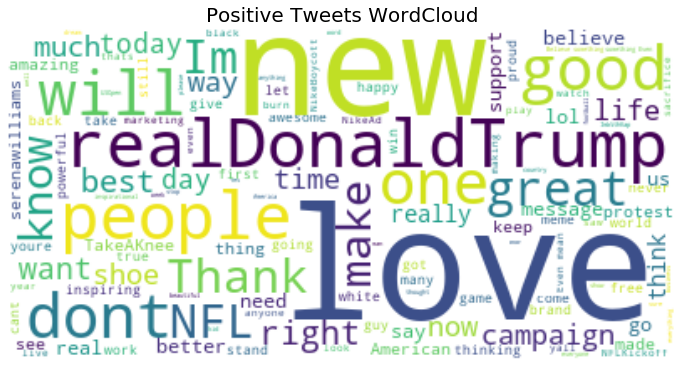

In [35]:
all_text_pos = " ".join(tweet for tweet in pos_tweets['tweet_text_clean'])
stopwords = list(STOPWORDS)

more_stop_words = ['Nike', 'nikes', 'Colin', 'Kaepernick7', 'Kaepernick', 'ad', 'commercial', 'justdoit', 'amp', 'colinkaepernick']
stopwords.extend(more_stop_words)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text_pos)
plt.figure(figsize=(12,12))
plt.title("Positive Tweets WordCloud", fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

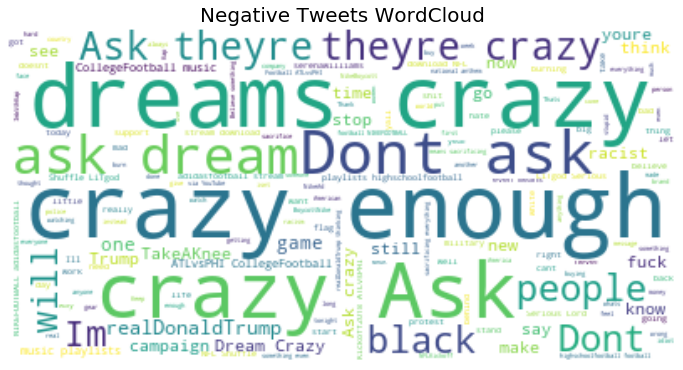

In [36]:
all_text_neg = " ".join(tweet for tweet in neg_tweets['tweet_text_clean'])
stopwords = list(STOPWORDS)

more_stop_words = ['Nike', 'nikes', 'Colin', 'Kaepernick7', 'Kaepernick', 'ad', 'commercial', 'justdoit', 'amp', 'colinkaepernick']
stopwords.extend(more_stop_words)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text_neg)
plt.figure(figsize=(12,12))
plt.title("Negative Tweets WordCloud", fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As you can probably tell from the negative word cloud, the word **crazy**, which is pivotal in the ad, is causing tweets to be classified as negative. In other words, tweets which quote the ad (either positively or negatively) will be classified as negative.

"Because what non-believers fail to understand is that calling a dream crazy is not an insult... it's a compliment"

Unfortunately, it seems like TextBlob's sentiment analyzer is a 'non-believer' at this point in time. It might be worth removing the word crazy in this instance to get a more accurate understanding of sentiment. The emphasis placed on single words and their meanings is the root of the problem. Words stand together as a conceptual unit and should be interpreted in this way. Classifying a tweet's sentiment based on each individual word can lead to some success, but is not the most effective way to complete this task. However, since this was an entirely unlabeled dataset, I am still excited about the results. Another approach would be to spend some time labeling a small portion of the dataset, train a supervised model, and use the trained model to complete the labeling process.